In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime as dt
warnings.filterwarnings('ignore')

In [54]:
df_retail = pd.read_csv('online_retail_II.csv')

In [55]:
df_retail.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [56]:
df_retail.shape

(1067371, 8)

In [57]:
df_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [58]:
df_retail.isnull().sum()

,0
Invoice,0
StockCode,0
Description,4382
Quantity,0
InvoiceDate,0
Price,0
Customer ID,243007
Country,0


In [59]:
#Dropping null values
df_retail.dropna(inplace=True)

In [60]:
df_retail.isnull().sum()

,0
Invoice,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
Price,0
Customer ID,0
Country,0


In [61]:
df_retail.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [62]:
#Checking for duplicates
df_retail[df_retail.duplicated()]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
371,489517,21912,VINTAGE SNAKES & LADDERS,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
383,489517,22130,PARTY CONE CHRISTMAS DECORATION,6,2009-12-01 11:34:00,0.85,16329.0,United Kingdom
384,489517,22319,HAIRCLIPS FORTIES FABRIC ASSORTED,12,2009-12-01 11:34:00,0.65,16329.0,United Kingdom
385,489517,21913,VINTAGE SEASIDE JIGSAW PUZZLES,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
386,489517,21821,GLITTER STAR GARLAND WITH BELLS,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067136,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
1067150,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
1067153,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
1067160,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


In [63]:
#checking which rows containing duplicates
df_retail.loc[(df_retail.Invoice=="489517") & (df_retail.StockCode=="21912")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
363,489517,21912,VINTAGE SNAKES & LADDERS,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
371,489517,21912,VINTAGE SNAKES & LADDERS,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
394,489517,21912,VINTAGE SNAKES & LADDERS,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom


In [64]:
df_retail.loc[(df_retail.Invoice=="489517") & (df_retail.StockCode=="22130")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
368,489517,22130,PARTY CONE CHRISTMAS DECORATION,6,2009-12-01 11:34:00,0.85,16329.0,United Kingdom
383,489517,22130,PARTY CONE CHRISTMAS DECORATION,6,2009-12-01 11:34:00,0.85,16329.0,United Kingdom


In [65]:
len(df_retail[df_retail.duplicated()])

26479

In [66]:
#We can drop the duplicated rows from the dataset
df_retail.drop(df_retail[df_retail.duplicated()].index, axis=0, inplace=True)

In [67]:
df_retail.shape

(797885, 8)

In [68]:
df_retail.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


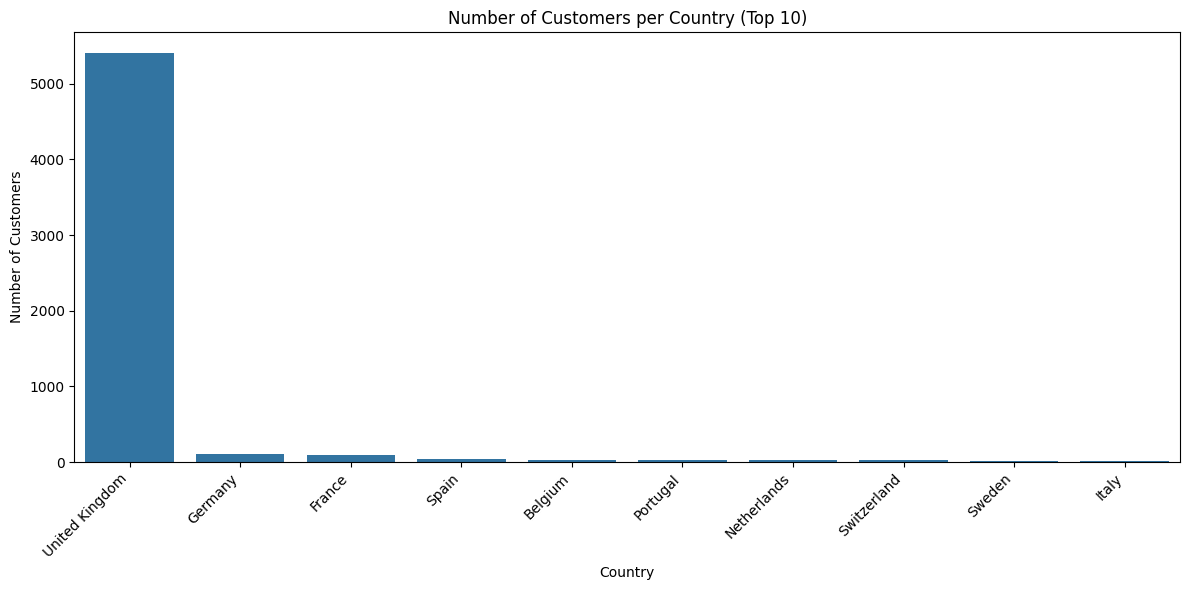

In [69]:
country_customer_count = df_retail.groupby('Country')['Customer ID'].nunique().reset_index()
# Sort by customer count and take the top 10
top_10_countries = country_customer_count.sort_values(by='Customer ID', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='Country', y='Customer ID', data=top_10_countries)
plt.title('Number of Customers per Country (Top 10)')
plt.xlabel('Country')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Info on United Kingdom**

In [71]:
uk_df=df_retail[df_retail.Country=='United Kingdom']
uk_df = uk_df[(uk_df['Quantity']>0)]

In [72]:
#most bought product in UK
uk_df['Description'].value_counts()[:10]

,count
Description,
WHITE HANGING HEART T-LIGHT HOLDER,4827
REGENCY CAKESTAND 3 TIER,2872
ASSORTED COLOUR BIRD ORNAMENT,2544
JUMBO BAG RED RETROSPOT,2418
PARTY BUNTING,1963
LUNCH BAG BLACK SKULL.,1949
REX CASH+CARRY JUMBO SHOPPER,1936
HOME BUILDING BLOCK WORD,1789
HEART OF WICKER SMALL,1772


In [74]:
#which customer bought the most number of items?
cust_data=pd.DataFrame()
cust_data['Customer ID']=list(set(df_retail['Customer ID']))
cust_data=cust_data.set_index('Customer ID')
for cust_id in cust_data.index:
    cust_data.at[cust_id,'Number_of_items']=(len(uk_df[uk_df['Customer ID']==cust_id]['Description']))
cust_data=cust_data.sort_values('Number_of_items',ascending=False)

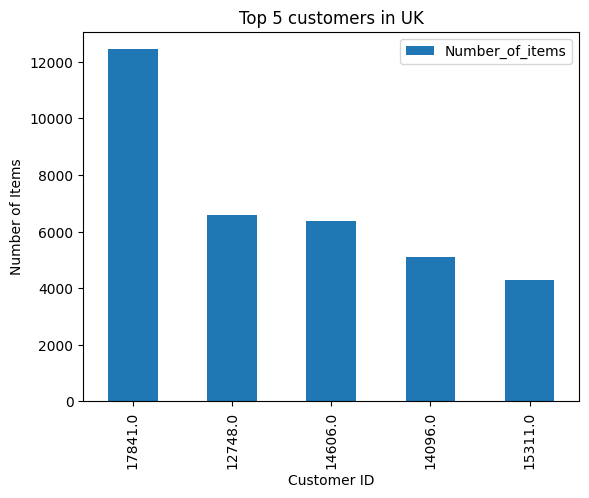

In [75]:
cust_data.head(5).plot(kind='bar')
plt.ylabel('Number of Items')
plt.title('Top 5 customers in UK')
plt.show()

In [76]:
 # most bought quantity
uk_df[uk_df['Quantity']==uk_df['Quantity'].describe()['max']]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1065882,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom
